Hey, everyone! Today we’re going to work on our first Machine Learning Project and that is “Titanic Survival Prediction”. It’s going to be a really cool project. You’re going to apply all your machine learning skills in this project. Titanic survival prediction is a classification problem where your target is to predict whether the passenger of titanic will survive or not. I hope you’re excited about this project.

So before starting, you need to have lots of things on your system like python, anaconda (jupyter notebook), and many python packages like numpy, pandas, sklearn, etc. But wait, what if I tell you, you don’t need any one of them to make this project. Yes, we are not going to download anything on our system. You just need to sign up on Kaggle. Kaggle is a great platform that holds machine learning competition and provides real-world datasets. It offers a no-setup, customizable, Jupyter Notebooks environment. Now, this article will be more focused on how to think about machine learning projects, rather than just implementation. I suggest you to practice the project in Kaggle itself with me.

Table of Contents
Understanding the titanic survival prediction project
Setting up things for any machine learning project.
#Understanding the titanic dataset.
#Importing necessary libraries&loading dataset
Exploratory Data Analysis
Data Preprocessing
Building machine learning model
Making Predictions
Submission
Titanic Survival Prediction – Kaggle Challenge

This project is based on the Titanic dataset given on Kaggle. It’s a legendary titanic machine learning competition to kick start your ML journey.  Moreover, the competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The Titanic Challenge:

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, the widely considered “unsinkable” Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.
Goal: Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data like age, gender, class, etc.

So, we’re going to solve this challenge from scratch and also submit our notebook on Kaggle under this competition. We’re going to cover everything like how to deal with the data, how to analyze data through different plots and graphs, how to do data preprocessing, and finally how to predict things.

Understanding the Titanic Dataset
So first we will understand our titanic dataset. This is a dataset of Titanic ship passengers & here

Each row represents the data of 1 passenger.
Columns represent the features. We have 10 features/ variables in this dataset.
Survival: This variable shows whether the person survived or not. This is our target variable & we have to predict its value. It’s a binary variable. 0 means not survived and 1 means survived.
pclass: The ticket class of passengers. 1st  (upper class), 2nd (middle), or 3rd (lower).
Sex: Gender of passenger
Age: Age (in years) of a passenger
sibsp: The no. of siblings/spouses of a particular passenger who were there on the ship.
parch: The no. of parents/children of a particular passenger who were there on the ship.
ticket: Ticket Number
fare: Passenger fare (like 1st class ticket fare must be greater than 2nd pr 3rd class ticket right)
cabin: Cabin Number
embarked: Port of Embarkation; From where that passenger took the ship. ( C = Cherbourg, Q = Queenstown, S = Southampton)
Clearly, it’s a classification problem because we need to tell whether the person will survive or not. We will use 5 different classifiers and compare their accuracy. The 5 different classifiers are as follows:

Random Forest Classifier
Logistic Regression
K-Neighbor
Decision Tree Classifier
Support Vector Machine

# Importing Libraries & Loading Dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('The shape of our training set: %s passengers and %s features'%(train.shape[0],train.shape[1]))

The shape of our training set: 891 passengers and 12 features


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As you can see we have 891 entries in total but some of the columns have less than 891 entries so that means we have missing values in these columns namely Age, Cabin & Embarked. So we have to preprocess our data first before training our ml model.

In [ ]:
# Checking Null Values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing entries in Age column. 687 missing entries are in Cabin column and 2 missing are in Embarked.



# Exploratory Data Analysis

Now we will analyze our data to see which variables are actually important to predict the value of the target variable. Hence, we are going to plot a heat map to see the correlation between the parameters and the target variable (Survived).

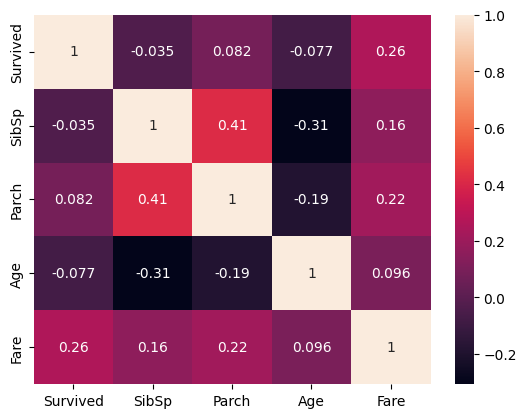

In [ ]:
heatmap = sns.heatmap(train[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

Now see the decimal values in the above color 2D matrix. These values are the correlation values. Just compare the survived column with the rest of the columns. The lighter the color is the more correlated the value is. Let’s compare the Survived with Sibsp you’re getting the value -0.035. It means that SibSp is not correlated to Survived.  Then Parch has a 0.082 value which shows very little correlation. Then Age, again no correlation. In the end, we have Fare whose value of correlation with the Survived variable is 0.26 which shows that the more the fare is, the more are the chances of survival.

Conclusion: But it does not mean that the other features are useless. We’ll explore more about them later.

Moving on, now we will understand all the features one by one. We’ll visualize the impact of each feature on the target variable. Let us start with SibSp that is the no. of siblings or spouses a passenger has.

SibSp – Number of Siblings / Spouses aboard the Titanic
To visualize surviving probability with respect to SibSp we will plot a bar graph.

In [ ]:
# Finding unique values
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

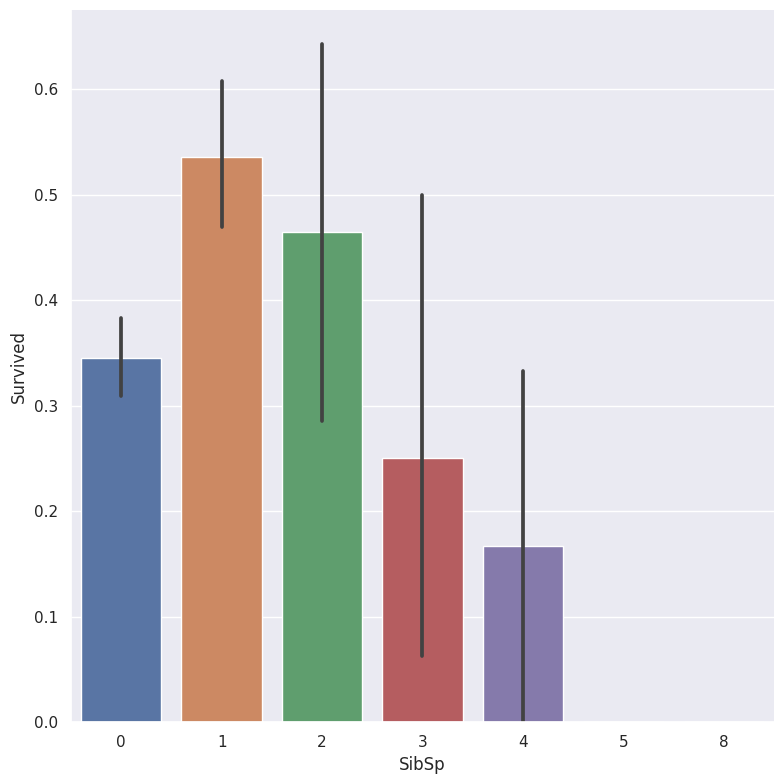

In [ ]:
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = train, kind="bar", height = 8)

Conclusion:

Passengers having 1 or 2 siblings have good chances of survival
More no. of siblings -> Fewer chances of survival


# Age Column

We’ll plot a graph so as to see the distribution of age with respect to target variable

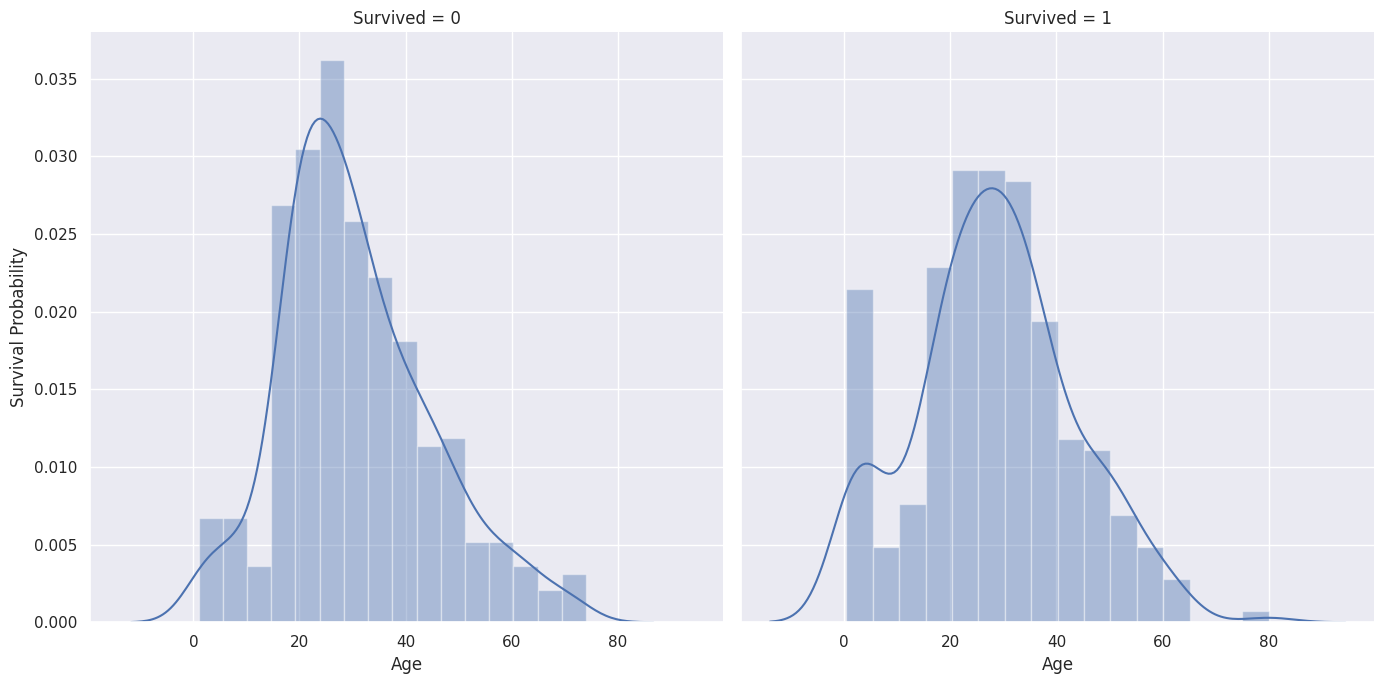

In [ ]:
ageplot = sns.FacetGrid(train, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

Conclusion More age -> less chances of survival!

#Gender Column

For gender we are simply going to use seaborn and will plot a bar graph

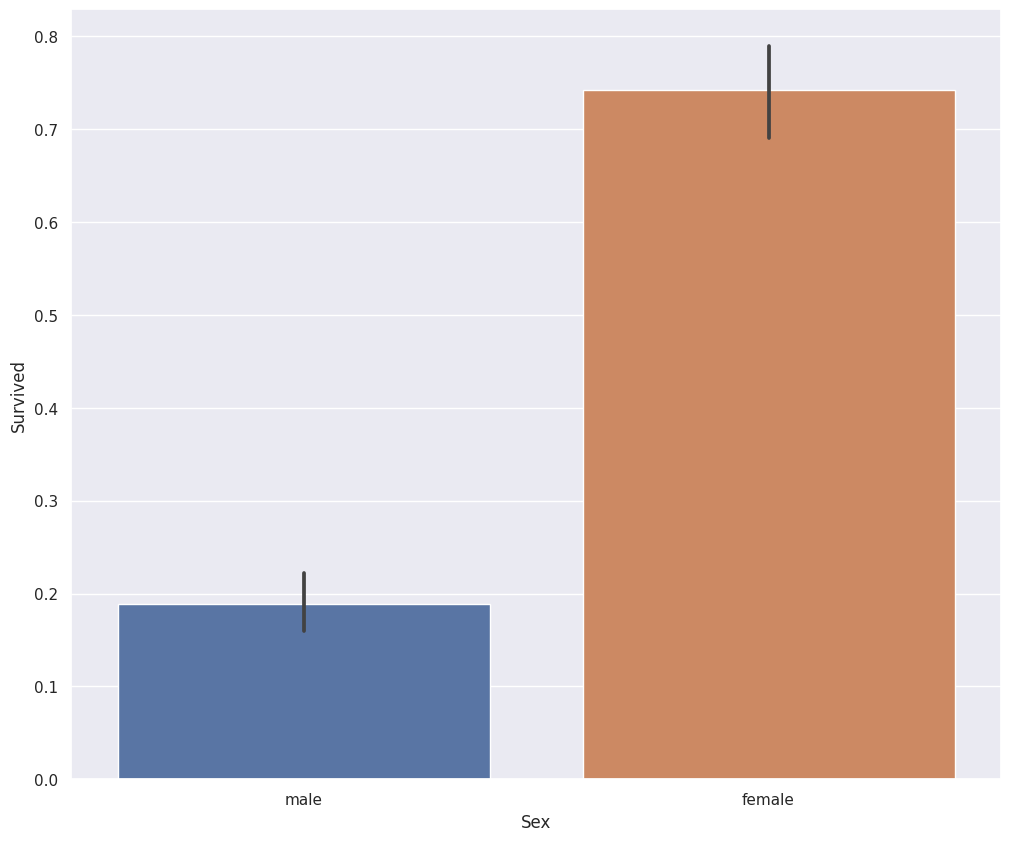

In [ ]:
sexplot = sns.barplot(x="Sex", y="Survived", data=train)

You can see from the above graph it’s quite obvious to say that man has less chances of survival over females. (Remember the Titanic scene when everyone was saying “Women and children first!” I want you to comment down “YES!” if you remember this scene.)

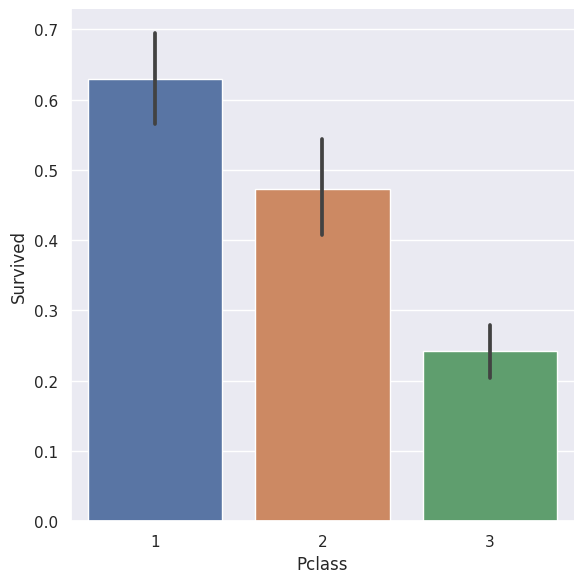

In [ ]:
pclassplot = sns.catplot(x = "Pclass", y="Survived", data = train, kind="bar", height = 6)

So a first class passenger has more chances of survival over 2nd and 3rd class passengers & Similarly the 2nd class passengers have more chances of survival over 3rd class passengers.

Now we will proceed to Data preprocessing of the Titanic dataset. Data preprocessing is a very crucial step in any machine learning project. Because the accuracy of the model depends completely on the quality of the dataset. Therefore it is necessary to clean the data before actually building the model. In a nutshell for any machine learning project, these are the basic steps you need to perform.

Steps of Machine Learning Project
Importing Libraries & Loading Dataset. (Part 1)
Exploratory analysis of data. ( Visualizations) (Part 1)
Data Preprocessing
Building machine learning models
Prediction
Let’s start with data preprocessing now.

# Data Preprocessing

Firstly, let’s see how many null values or missing values are there in each column. For this, we’re going to use isnull() and sum() methods. Write the following line in a new code cell and do shift + enter to run this cell.

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling Missing Values of Age Column

In order to handle null values, we are going to fill missing values with random values within the range of [mean value – standard deviation, mean value + standard deviation]. So that we get normally distributed data.

In [ ]:
mean = train["Age"].mean()
std = train["Age"].std()

rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = train["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train["Age"] = age_slice

# Again checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As you can see there are no missing values in the age column now. But what about 687 null values of the Cabin column? Actually, we don’t need to do anything about that. Because if you observe carefully there are some features that have nothing to do with survival probability like PassengerId, Ticket No., Name of the passenger, and Cabin number. So we can safely drop them before building our ml model.

# Dropping 🗑️ Columns

In [ ]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
train.drop(col_to_drop, axis=1, inplace=True)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,24.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


# Converting Categorical Variables to Numeric

Now as you can observe we have 2 categorical variables namely Sex and Embarked. Machine learning models only understand numbers and not alphabets. So we have to convert these categorical columns to numerical.

In [ ]:
genders = {"male":0, "female":1}
train["Sex"] = train["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
train["Embarked"] = train["Embarked"].map(ports)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


# Building Machine Learning Model 🤖

So, this was all about data preprocessing. Now we are good to go with our titanic dataset. Let’s quickly train our machine learning model.

In [ ]:
df_train_x = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Target variable column
df_train_y = train[['Survived']]

# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)


# Random Forest Classifier

In [28]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (e.g., mean, median, most frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
x_train = imputer.fit_transform(x_train)

# Use the same imputer to transform your test data
x_test = imputer.transform(x_test)

# Now, your data should no longer contain NaN values, and you can fit the RandomForestClassifier.
# Drop rows with NaN values in the training and test datasets
nan_indices = np.isnan(x_train).any(axis=1)

# Remove rows with NaN values
x_train = x_train[~nan_indices]
y_train = y_train[~nan_indices]

from sklearn.ensemble import RandomForestClassifier

# Create the classifier
clf1 = RandomForestClassifier()

# Fit the model using training data
clf1.fit(x_train, y_train)

# Now, you can make predictions
rfc_y_pred = clf1.predict(x_test)


# Calculating Accuracy to compare all models
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 81.56424581005587


# Logistic Regression

In [ ]:
clf2 = LogisticRegression()
clf2.fit(x_train, y_train)
lr_y_pred = clf2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 79.88826815642457


# K-Neighbor Classifier

In [ ]:
clf3 = KNeighborsClassifier(5)
clf3.fit(x_train, y_train)
knc_y_pred = clf3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 70.39106145251397


In [ ]:
#Decision Tree Classifier
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(x_train, y_train)
dtc_y_pred = clf4.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 79.3296089385475


In [ ]:
#Support Vector Machine
clf5 = svm.SVC()
clf5.fit(x_train, y_train)
svm_y_pred = clf5.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

accuracy= 65.36312849162012


In [29]:
#Accuracy Scores of All Classifiers
print("Accuracy of Random Forest Classifier =",rfc_accuracy)
print("Accuracy of Logistic Regressor =",lr_accuracy)
print("Accuracy of K-Neighbor Classifier =",knc_accuracy)
print("Accuracy of Decision Tree Classifier = ",dtc_accuracy)
print("Accuracy of Support Vector Machine Classifier = ",svm_accuracy)

Accuracy of Random Forest Classifier = 81.56424581005587
Accuracy of Logistic Regressor = 79.88826815642457
Accuracy of K-Neighbor Classifier = 70.39106145251397
Accuracy of Decision Tree Classifier =  79.3296089385475
Accuracy of Support Vector Machine Classifier =  65.36312849162012


Subsequently, we can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score almost the same, we choose to use Random Forest as they correct for decision trees’ habit of overfitting to their training set.



# Final Prediction


So, now it’s time to use test.csv for making predictions. For testing data also we need to do the steps of preprocessing that we did earlier. And then only we can predict whether a passenger will survive or not. Hence, I highly encourage you to do all the things for test.csv by yourself.



In [31]:
# Importing test.csv
test_data = pd.read_csv('test.csv')
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
# Replacing missing values of age column
mean = test_data["Age"].mean()
std = test_data["Age"].std()
rand_age = np.random.randint(mean-std, mean+std, size = 86)
age_slice = test_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
test_data["Age"] = age_slice

# Replacing missing value of Fare column
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [35]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
test_data.drop(col_to_drop, axis=1, inplace=True)
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [36]:
genders = {"male":0, "female":1}
test_data["Sex"] = test_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
test_data["Embarked"] = test_data["Embarked"].map(ports)

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [38]:
#final submission
x_test = test_data
y_pred = clf1.predict(x_test)
originaltest_data = pd.read_csv('test.csv')
submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
